<p><strong class="ql-size-large">Частина третя: Аналіз датасет c Kaggle.com</strong></p>

<ul>
<li>Прочитайте csv файл (використовуйте функцію&nbsp;<code>read_csv</code>)</li>
<li>Виведіть перші п'ять рядків (використовується функція&nbsp;<code>head</code>)</li>
<li>Виведіть розміри датасету (використовуйте атрибут&nbsp;<code>shape</code>)</li>
<li><strong>Про скільки книг зберігає дані датасет?</strong>
<strong>Відповідь: 550</strong></li>
</ul>

In [2]:
import pandas as pd

bestsellers_dataset = pd.read_csv('bestsellers with categories.csv')

print(bestsellers_dataset.head)
print('========================')
print(bestsellers_dataset.shape)
print('========================')
print(bestsellers_dataset.columns)
bestsellers_dataset.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print('========================')
print(bestsellers_dataset.columns)


<bound method NDFrame.head of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson    


<li>Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції&nbsp;<code>isna</code>&nbsp;та&nbsp;<code>sum</code>)</li>
<li><strong>Запитання:</strong> Чи є в якихось змінних пропуски? (Так / ні)</li>
<li><strong>Відповідь: Ні </strong></li>

In [3]:
missing_values = bestsellers_dataset.isna().sum()
print(missing_values)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


<li>Перевірте, які є унікальні значення в колонці&nbsp;<code>genre</code>&nbsp;(використовуйте функцію&nbsp;<code>unique</code>)</li>
<li><strong>Запитання:</strong> Які є унікальні жанри?</li>
<li><strong>Відповідь: 'Non Fiction', 'Fiction'</strong></li>



In [4]:
unique_genres = bestsellers_dataset['genre'].unique()
print(unique_genres)

['Non Fiction' 'Fiction']


<li>Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте&nbsp;<code>kind='hist'</code>)</li>
<li>Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)</li>
<li><strong>Відповідь:</strong> Максимальна ціна? <strong>105</strong> </li>
<li><strong>Відповідь:</strong> Мінімальна ціна? <strong>0</strong></li>
<li><strong>Відповідь:</strong> Середня ціна? <strong>13.1</strong></li>
<li><strong>Відповідь: </strong>Медіанна ціна? <strong>11.0</strong></li>

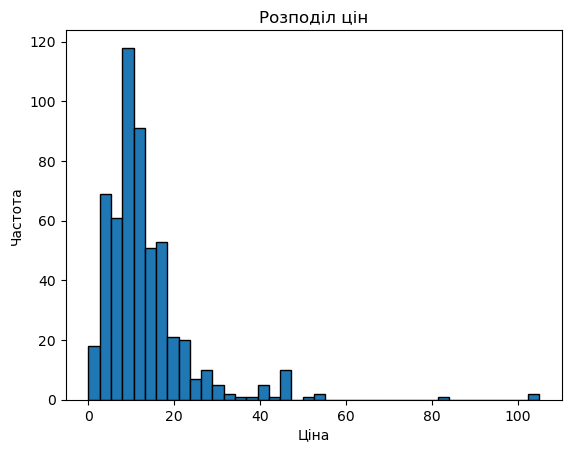

Мінімальна ціна: 0
Максимальна ціна: 105
Середня ціна: 13.1
Медіанна ціна: 11.0


In [5]:
import matplotlib.pyplot as plt

bestsellers_dataset['price'].plot(kind='hist', bins=40, edgecolor='black')
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

# Визначення максимальної, мінімальної, середньої та медіанної ціни
min_price = bestsellers_dataset['price'].min()
max_price = bestsellers_dataset['price'].max()
mean_price = bestsellers_dataset['price'].mean()
median_price = bestsellers_dataset['price'].median()

print("Мінімальна ціна:", min_price)
print("Максимальна ціна:", max_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)

<strong class="ql-size-large">Пошук та сортування даних</strong>

<li><strong>Відповідь:</strong> Який рейтинг у датасеті найвищий? Відповідь: <strong>4.9</strong></li>

In [6]:
max_rating = bestsellers_dataset['user_rating'].max()
print(f"Максимальний рейтинг користувача у датасеті: {max_rating}")

Максимальний рейтинг користувача у датасеті: 4.9


<li><strong>Відповідь:</strong> Скільки книг мають такий рейтинг? Відповідь: <strong>52</strong></li>


In [7]:
books_max_rating = bestsellers_dataset[bestsellers_dataset['user_rating'] == max_rating].shape[0]
print(f"Кількість книг з максимальним рейтингом: {books_max_rating}")

Кількість книг з максимальним рейтингом: 52


<li><strong>Відповідь:</strong> Яка книга має найбільше відгуків? Відповідь: <strong>'Where the Crawdads Sing'</strong></li>

In [8]:
index_max_reviews = bestsellers_dataset['reviews'].idxmax()
book_max_reviews = bestsellers_dataset.loc[index_max_reviews, 'name']
number_reviews_book = bestsellers_dataset.loc[index_max_reviews, 'reviews']

print(f"Найбільше відгуків: {number_reviews_book} має '{book_max_reviews}'") 

Найбільше відгуків: 87841 має 'Where the Crawdads Sing'


<li><strong>Відповідь:</strong> З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: <strong>'Publication Manual of the American Psychological Association, 6th Edition' з ціною 46$</strong></li>

In [12]:
df_2015 = bestsellers_dataset[bestsellers_dataset['year'] == 2015]
index_max_price_book_2015 = df_2015['price'].idxmax()
name_book_2015max = df_2015.loc[index_max_price_book_2015, 'name']
price_book_2015max = df_2015.loc[index_max_price_book_2015, 'price']
print(f"Найдорожча серед книг Топ-50 за 2015 рік: '{name_book_2015max}' з ціною {price_book_2015max}$")

Найдорожча серед книг Топ-50 за 2015 рік: 'Publication Manual of the American Psychological Association, 6th Edition' з ціною 46$


<li><strong>Відповідь:</strong> Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте&nbsp;<code>&amp;</code>)? Відповідь: <strong>20</strong></li>

In [13]:
fiction_books_2010 = bestsellers_dataset[(bestsellers_dataset['year'] == 2010) & (bestsellers_dataset['genre'] == 'Fiction')]
fiction_books_count = fiction_books_2010.shape[0]
print("Кількість книг жанру Fiction у Топ-50 у 2010 році:", fiction_books_count)

Кількість книг жанру Fiction у Топ-50 у 2010 році: 20


<li><strong>Відповідь:</strong> Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте&nbsp;<code>|</code>&nbsp;або функцію&nbsp;<code>isin</code>)? Відповідь: <strong>1</strong></li>

In [19]:
high_rated_books = bestsellers_dataset[(bestsellers_dataset['user_rating'] == 4.9) & (bestsellers_dataset['year'].isin([2010, 2011]))]
high_rated_books_count = high_rated_books.shape[0]
print("Кількість книг з рейтингом 4.9 у 2010 та 2011 роках:", high_rated_books_count)

Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1


<li>І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію&nbsp;<code>sort_values</code>).</li>
<li><strong>Відповідь: </strong>Яка книга остання у відсортованому списку? Відповідь: <strong> Old School (Diary of a Wimpy Kid #10)</strong></li>

In [30]:
df_2015_under_8 = bestsellers_dataset[(bestsellers_dataset['year'] == 2015) & (bestsellers_dataset['price'] < 8)]
df_sorted = df_2015_under_8.sort_values(by='price', ascending=True)
last_book = df_sorted.iloc[-1]
print("Остання книга у відсортованому списку:", last_book['name'])

Остання книга у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


<p><strong class="ql-size-large">Агрегування даних та з'єднання таблиць</strong></p>

<li>Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції&nbsp;<code>groupby</code>&nbsp;та&nbsp;<code>agg</code>, для підрахунку мінімальних та максимальних значень використовуйте&nbsp;<code>max</code>&nbsp;та&nbsp;<code>min</code>). Не беріть усі стовпці, виберіть тільки потрібні вам</li>
<li><strong>Відповідь:</strong> Максимальна ціна для жанру Fiction: 82</li>
<li><strong>Відповідь: </strong>Мінімальна ціна для жанру Fiction: 0</li>
<li><strong>Відповідь:</strong> Максимальна ціна для жанру Non Fiction: 105</li>
<li><strong>Відповідь:</strong> Мінімальна ціна для жанру Non Fiction: 0</li>

In [34]:
genre_prices = bestsellers_dataset.groupby('genre')['price'].agg([max, min])
for genre, prices in genre_prices.iterrows():
    print(f"Максимальна ціна для жанру {genre}: {prices['max']}")
    print(f"Мінімальна ціна для жанру {genre}: {prices['min']}")

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0


<li>Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції&nbsp;<code>groupby</code>&nbsp;та&nbsp;<code>agg</code>, для підрахунку кількості використовуйте&nbsp;<code>count</code>). Не беріть усі стовпці, виберете тільки потрібні</li>
<li><strong>Відповідь: </strong>Якої розмірності вийшла таблиця? Відповідь: (248, 1)</li>
<li><strong>Відповідь:</strong> Який автор має найбільше книг? Відповідь: Jeff Kinney</li>
<li><strong>Відповідь: </strong>Скільки книг цього автора? Відповідь: 12</li>

In [39]:
author_book_count = bestsellers_dataset.groupby('author').agg(num_books=('name', 'count'))
print("Розмір таблиці:", author_book_count.shape)

max_books_author = author_book_count['num_books'].idxmax()
max_books_count = author_book_count.loc[max_books_author, 'num_books']
print("Автор з найбільшою кількістю книг:", max_books_author)
print("Кількість книг цього автора:", max_books_count)



Розмір таблиці: (248, 1)
Автор з найбільшою кількістю книг: Jeff Kinney
Кількість книг цього автора: 12


<li>Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції&nbsp;<code>groupby</code>&nbsp;та&nbsp;<code>agg</code>, для підрахунку середнього значення використовуйте&nbsp;<code>mean</code>). Не беріть усі стовпці, виберете тільки потрібні</li>
<li><strong>Відповідь:</strong> У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt</li>
<li><strong>Відповідь:</strong> Який у цього автора середній рейтинг? Відповідь: 3.9</li>

In [40]:
author_avg_rating = bestsellers_dataset.groupby('author').agg(avg_rating=('user_rating', 'mean'))

min_rating_author = author_avg_rating['avg_rating'].idxmin()
min_avg_rating = author_avg_rating.loc[min_rating_author, 'avg_rating']

print("Автор з мінімальним середнім рейтингом:", min_rating_author)
print("Середній рейтинг у цього автора:", min_avg_rating)

Автор з мінімальним середнім рейтингом: Donna Tartt
Середній рейтинг у цього автора: 3.9


<li>З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію&nbsp;<code>concat</code>&nbsp;з параметром&nbsp;<code>axis=1</code>). Збережіть результат у змінну</li>
<li>Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію&nbsp;<code>sort_values</code>)</li>
<li><strong>Відповідь: </strong>Який автор перший у списку? <strong> Muriel Barbery</strong></li>

In [43]:
merged_df = pd.concat([author_book_count, author_avg_rating], axis=1)
sorted_df = merged_df.sort_values(by=['num_books', 'avg_rating'], ascending=[True, True])

print("Перший автор у списку:", sorted_df.index[0])

merged_df
sorted_df


Перший автор у списку: Muriel Barbery


,num_books,avg_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364
